# Tratando dados do levantamento físico e banco de dados Suap

In [1]:
import pandas as pd

#total geral = 10044; total livros = 4706; total geral sem livros = 5355

suap = pd.read_excel('suap.xlsx')
# print('suap info')
# display(suap.info())

priori= pd.read_excel('priori_completo.xlsx')

# capturando segunda planilha e removendo coluna observação
priori2 = pd.read_excel('priori_completo.xlsx', sheet_name=1)
priori2 = priori2.drop(columns='Observação')

# juntando planilhas
priori = pd.concat([priori, priori2])

priori_ED = priori['C. Custo'].drop_duplicates()
priori_ED = priori_ED.drop([6606, 6607])
# IFPE449052-99 IFPE449052-87 elementos de despesa dropados

priori_ED = priori_ED.sort_values(ascending=True)

# display(priori.info())


# priori_livros = priori[priori['ED_priori'].str.contains('449052-18')]
# priori = priori[priori['ED_priori'].str.contains('449052-18')==False]
# display(priori.info())


In [2]:
livros1 = pd.read_table("parte 1 biblio.xls")
livros2 = pd.read_table("parte 2 biblio.xls")
livros3 = pd.read_table("parte 3 biblio.xls")
livros4 = pd.read_table("parte 4 biblio.xls")
livros5 = pd.read_table("parte 5 biblio.xls")

suap_livros = pd.concat([livros1, livros2, livros3, livros4, livros5])

suap_total = pd.concat([suap, suap_livros])
suap_total['DATA DA ENTRADA'] = pd.to_datetime(suap_total['DATA DA ENTRADA'])
# dropando itens com entrada após abril 2021
suap_total = suap_total[suap_total['DATA DA ENTRADA'] < '2021-05-01']
# print(suap_total.info())
# dropando itens levantados virtualmento pela priori 
# suap_mod = suap_total[suap_total['DESCRICAO'].str.contains('MÓDULO DIDÁTICO,')]

lista_drop = ['MÓDULO DIDÁTICO,', 'PLACA DE GESSO ACARTONADO', 'PORTA PARA DIVISÓRIA', 'Conjunto de guarda corpo medindo', 
             'PAR de corrimão em ferro', 'COBERTURA LEVE', 'KIT SALA MODULAR', 'CADEIRA ESCOLAR EM RESINA', 
             'CARTEIRA ESCOLAR - EM RESINA', 'CADEIRA PLASTICA UNIVERSAL',
             'CADEIRA ESCOLAR', 'CADEIRA COMUM. CADEIRA DE PLÁSTICO', 'MESA QUADRADA DE PLÁSTICO', 
             'POLTRONA PRANCHETA EM RESINA']



suap_ED = suap_total['ED'].drop_duplicates()
suap_ED = suap_ED.sort_values(ascending=True)

# print(len(suap_ED))


In [3]:
def dropar_descricao(data_frame, coluna, lista):

    for item in lista:
#         data_drop = data_frame[data_frame[coluna].str.contains(item)]
        data_frame = data_frame[data_frame[coluna].str.contains(item)==False]
#         print(f'{item} - {len(data_drop)}')
    return data_frame

priori = dropar_descricao(priori, 'Descrição', lista_drop)
suap_total = dropar_descricao(suap_total, 'DESCRICAO', lista_drop)

# print(suap_total.info())

In [4]:
suap_merge = suap_total[['NUMERO', 'SALA', 'DESCRICAO', 'CARGA ATUAL', 'ED']]
priori_merge = priori[['Nr. Ativo', 'Nome Local', 'Descrição', 'C. Custo']]
priori_merge = priori_merge.rename(columns={'Nr. Ativo': 'NUMERO', 'Nome Local': 'SALA_priori', 'Descrição': 'DESCRICAO_priori', 'C. Custo': 'ED_priori'})
# display(priori_merge.info())
# display(suap_merge.info())

diferenca = pd.merge(suap_merge, priori_merge, on='NUMERO', how='outer', indicator=True)

diferenca.to_excel('diferenca_total.xlsx', index=False)

TypeError: only size-1 arrays can be converted to Python scalars

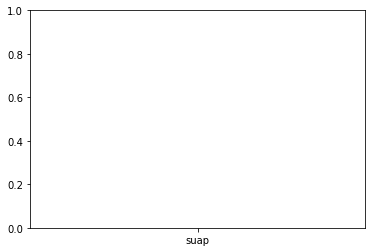

In [19]:
import matplotlib.pyplot as plt

label = ['suap', 'priori']
qtds = [len(suap_total), len(priori)]

colors = ['red', 'green']
chart = plt.bar(label, qtds, colors)
plt.show()